### 자기회귀(AR, Autoregressive Model)
- 현 시점의 자료가 p시점 전의 유한개의 과거 자료로 설명될 수 있다.
- 과거의 데이터가 미래 데이터에 영향을 준다고 가정하는 모델이다.
- 현 시점의 시계열 자료에서 몇 번째 전 자료까지 영향을 주는 가를 파악하는 데에 사용된다.
- 현재 시점의 데이터가 직전 시점의 데이터에만 영향을 받는 모델을 1차 자기회귀 모형이라 하고, AR(1)로 표기한다.
- 이를 알아내기 위해서는 데이터의 패턴을 분석해야 하고, 이때 **ACF, PACF**를 사용한다.
- 표준정규분포 영역 내에 들어가는 첫 번째 지점을 절단점이라고 하며, 절단점에서 1을 빼준 값이 AR모델의 차수이다.

> 1. ACF  
> 만약 자기회귀 모델이라면,  
> 현재 데이터와 멀리 떨어진 과거 데이터의 영향력은 점점 줄어들기 때문에 시간이 지남에 따라 상관관계가 줄어든다.

> 2. PACF  
> 만약 자기회귀 모델이라면,  
> 특정 시점 이후에 급격히 감소하는 모양이 나타난다.

- 즉, 자기회귀 모델이라면, ACF는 시차가 증가함에 따라 점차 감소하고 PACF는 특정 시점 이후에 급격히 감소하여 절단된 형태를 보인다.
- 자기회귀 모델을 식별함으로써 데이터의 기본 패턴과 구조를 이해할 수 있고,  
  이를 통해 데이터가 어떻게 변동하는지, 과거 데이터가 미래에 어떤 영향을 미치는지에 대한 통찰력을 제공한다,

### 이동평균 (MA, Moving Average)
- 일정 기간 동안의 데이터를 평균하여 시계열 데이터의 부드러운 패턴(스무딩)을 확인할 수 있게 해준다.
- 특정 기간 동안의 데이터를 평균한 값으로, 시계열 데이터의 일정 기간의 평균을 보여준다.
- 데이터의 변동을 부드럽게 만들어서 패턴을 파악하는데 도움이 되며, 시계열 데이터의 추세를 이해하고 예측하는 데에 유용한 도구이다.

<img src='./images/ma.jpeg'>

### 안정 시계열 (ARMA)
- 과거의 데이터와 최근의 평균을 사용하여 시계열 데이터의 패턴을 파악하고 예측하는 데에 사용한다.
- 2022년 3월 기준으로 ARMA가 중단되고 ARIMA로 대체되었다.
- ARMA 모델은 시계열 데이터의 과거 값을 기반으로 한 선형 예측 모델이기 때문에  
  시계열 데이터가 정상성을 보이고, 예측에 영향을 주는 외부 요인이 없는 등의 가정을 만족해야 한다.
- 비정상성 데이터나 비선형적인 패턴을 갖는 데이터의 경우 패턴 파악 및 예측이 어렵다.
- ARMA(1, 0) = AR(1)
- ARMA(0, 1) = MA(1)
- ARMA(1, 1) = AR(1), MA(1)

### 불안정 시계열 (ARIMA)
- ARIMA(p, d, q): d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모델이다.
- Autoregressive, Integrated(누적 차분), Moving Average의 세 가지 요소로 구성되어 있다.
- d는 비정상 시계열을 정상 시계열로 만들기 위해서 필요한 차분 횟수를 의미한다.

In [1]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start ='2014-05-01')
google_stock_df = google_stock_df['Adj Close']
google_stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.494759,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.324226,33770463
2014-05-05,26.169153,26.372595,25.994633,26.318243,26.318243,20482080
2014-05-06,26.189596,26.268379,25.682489,25.686478,25.686478,33780490
2014-05-07,25.718889,25.763268,25.096100,25.428186,25.428186,64486563
...,...,...,...,...,...,...
2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600
2024-06-05,176.535004,177.970001,175.289993,177.070007,177.070007,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.350006,14255800


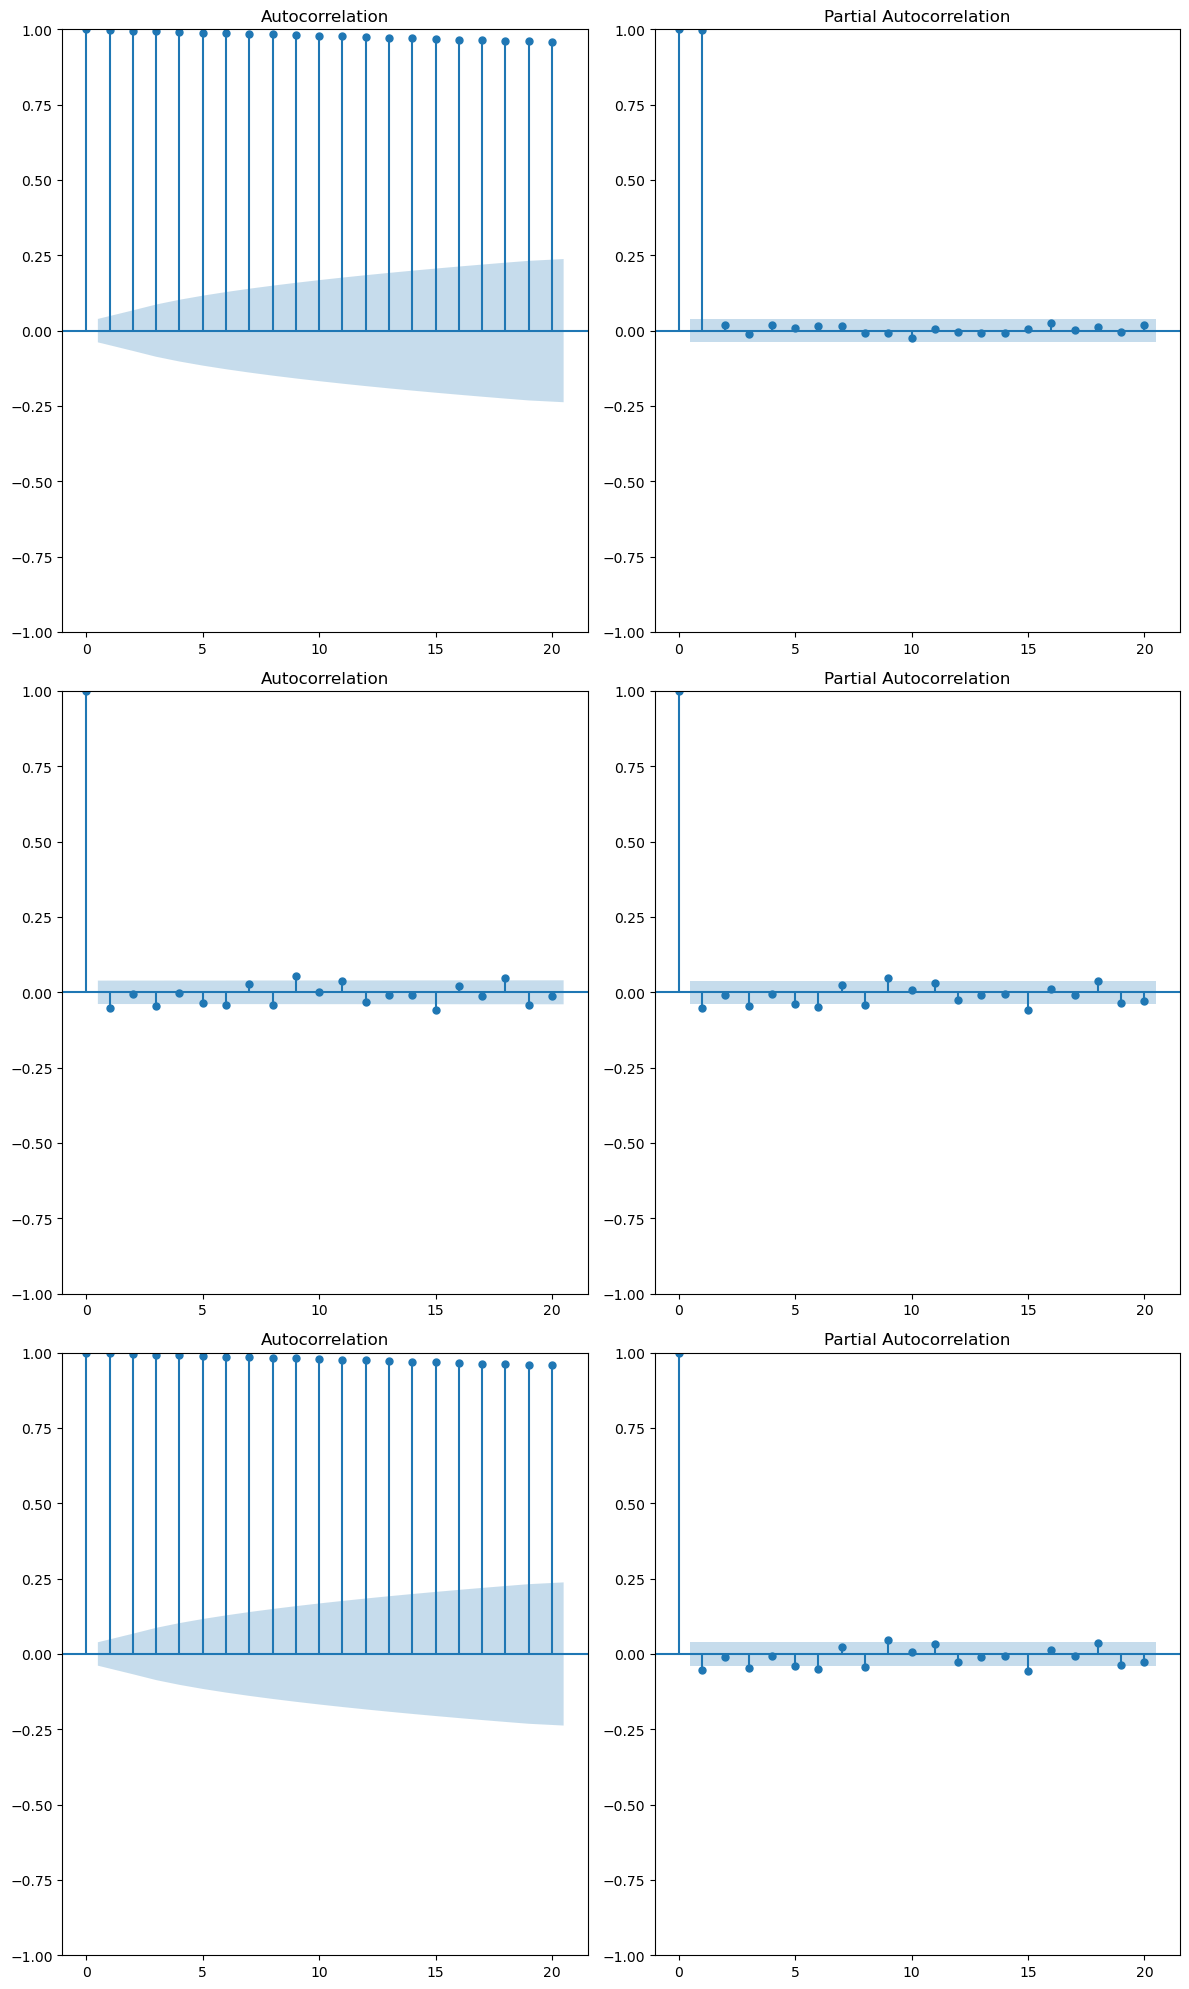

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(3, 2, figsize=(12, 20))

plot_acf(google_stock_df, lags=20, ax=ax[0][0])
plot_pacf(google_stock_df, lags=20, ax=ax[0][1])

plot_acf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][1])

# 우리가 원하는 가장 이상적인 그래프 (초기 acf로 확인하고 필요시 pacf로 확인한다)
plot_acf(google_stock_df, lags=20, ax=ax[2][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[2][1])

plt.tight_layout()
plt.show()

In [7]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start ='2014-05-01')
google_stock_df = google_stock_df['Adj Close']
google_stock_df

[*********************100%%**********************]  1 of 1 completed


Date
2014-05-01     26.494759
2014-05-02     26.324226
2014-05-05     26.318243
2014-05-06     25.686478
2014-05-07     25.428186
                 ...    
2024-06-04    175.130005
2024-06-05    177.070007
2024-06-06    178.350006
2024-06-07    175.949997
2024-06-10    176.630005
Name: Adj Close, Length: 2545, dtype: float64

In [9]:
google_stock_diff_df = google_stock_df.diff()
google_stock_diff_df.dropna(inplace=True)
google_stock_diff_df

Date
2014-05-02   -0.170532
2014-05-05   -0.005983
2014-05-06   -0.631765
2014-05-07   -0.258291
2014-05-08    0.051859
                ...   
2024-06-04    0.710007
2024-06-05    1.940002
2024-06-06    1.279999
2024-06-07   -2.400009
2024-06-10    0.680008
Name: Adj Close, Length: 2544, dtype: float64

In [15]:
window_size = 20

moving_avg = google_stock_df.rolling(window_size).mean()
print(moving_avg)

moving_avg_diff = google_stock_diff_df.rolling(window_size).mean()
print(moving_avg_diff)


Date
2014-05-01           NaN
2014-05-02           NaN
2014-05-05           NaN
2014-05-06           NaN
2014-05-07           NaN
                 ...    
2024-06-04    174.765999
2024-06-05    174.970499
2024-06-06    175.330000
2024-06-07    175.548499
2024-06-10    175.865500
Name: Adj Close, Length: 2545, dtype: float64
Date
2014-05-02         NaN
2014-05-05         NaN
2014-05-06         NaN
2014-05-07         NaN
2014-05-08         NaN
                ...   
2024-06-04    0.265000
2024-06-05    0.204501
2024-06-06    0.359500
2024-06-07    0.218500
2024-06-10    0.317001
Name: Adj Close, Length: 2544, dtype: float64


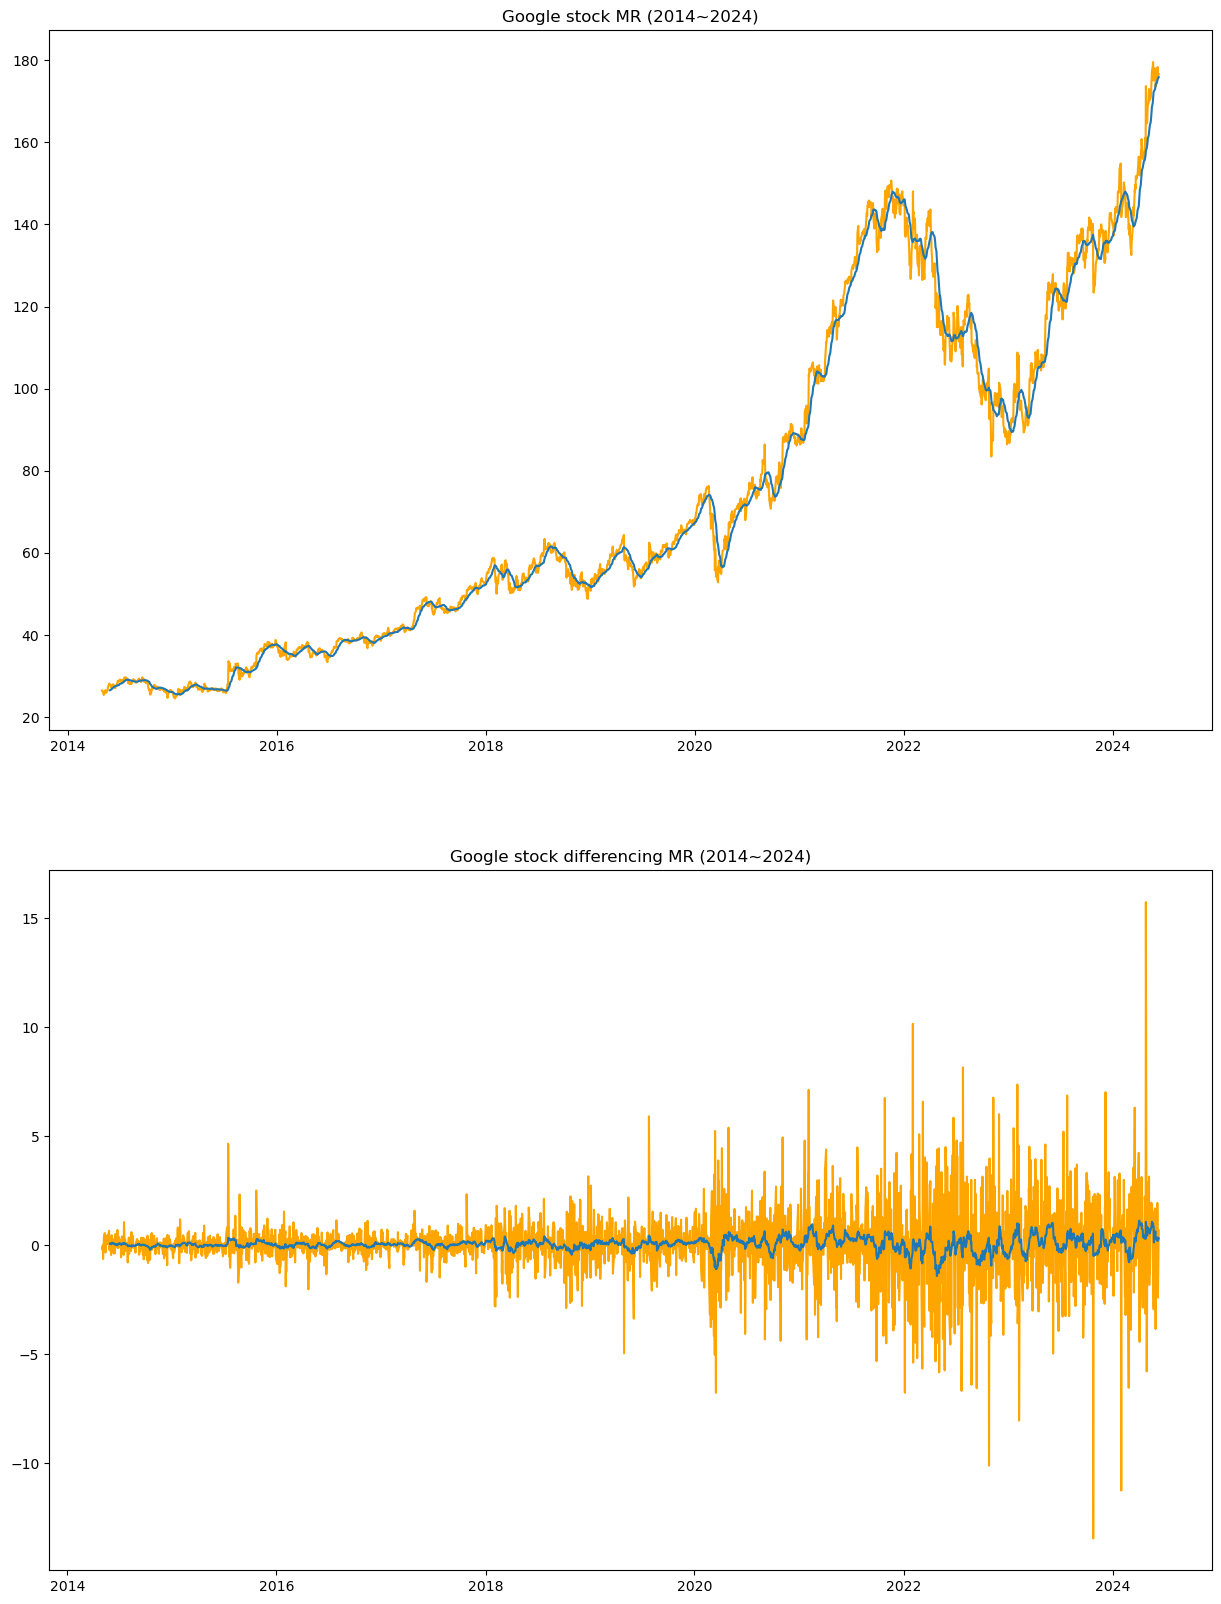

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 20))


plt.subplot(2,1,1)
plt.plot(google_stock_df, c='orange')

plt.subplot(2,1,1)
plt.plot(moving_avg)

plt.title('Google stock MR (2014~2024)')

plt.subplot(2,1,2)
plt.plot(google_stock_diff_df, c='orange')

plt.subplot(2,1,2)
plt.plot(moving_avg_diff)

plt.title('Google stock differencing MR (2014~2024)')

plt.show()

#### ARIMA

In [18]:
google_stock_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2545 entries, 2014-05-01 to 2024-06-10
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
2545 non-null   float64
dtypes: float64(1)
memory usage: 39.8 KB


In [ ]:
import pandas as pd

# 인덱스 값이 datetime이 아닌 경우 변경해주는 함수 (reindex)
# google_stock_df = google_stock_df.reindex(pd.date_range(google_stock_df.index[0], google_stock_df.index[-1]))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


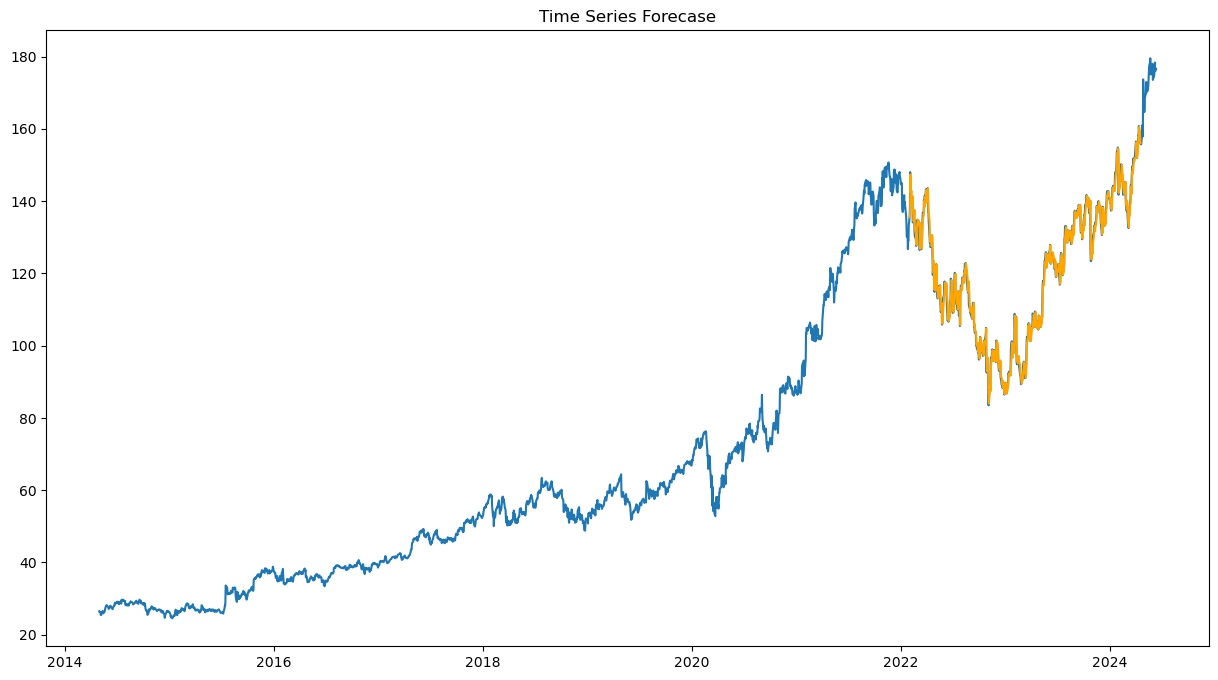

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(google_stock_df, order = (1, 1, 1))
model_fit = model.fit()

# 머신러닝에서는 전체를 훈련시켜서 그 기간내에 잘 맞추는 지 평가
# 모델평가
# 이유: 다음 차수를 알아야 다음을 알 수 있는데 1개 1개 업데이트를 쳐야 하기 때문에
start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-04-17')

forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(google_stock_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title('Time Series Forecase')
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Error', mse)

msle = mean_squared_log_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Log Error', msle)

Mean Squared Error 6.389218962415807
Mean Squared Error 0.00045602246987733533
